# Imports

In [2]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, tree , metrics
from sklearn.model_selection import train_test_split
import random

In [3]:
random.seed(2021)

### Carregue o dataset

Iremos usar o conjunto de dados "Optical Recognition of Handwritten Digits", nele foram usados programas de pré-processamento disponibilizados pelo NIST para extrair bitmaps normalizados de dígitos manuscritos de um formulário pré-impresso. De um total de 43 pessoas, 30 contribuíram para o conjunto de treinamento e 13 diferentes para o conjunto de teste. Os bitmaps de 32x32 são divididos em blocos não sobrepostos de 4x4 e o número de pixels é contado em cada bloco. Isso gera uma matriz de entrada de 8x8, onde cada elemento é um número inteiro no intervalo de 0 a 16. Isso reduz a dimensionalidade e dá invariância a pequenas distorções.

In [4]:
digits = datasets.load_digits()

### Imprima a variável digits. O que tem no seu conteúdo?


In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

#### A variavel é composta por:
* data: contém um array de arrays 
* target
* frame
* features_names
* target_names
* images: imagens codificadas em arrays
* description: descrição do dataset

### Para visualizar os dígitos execute a célula abaixo

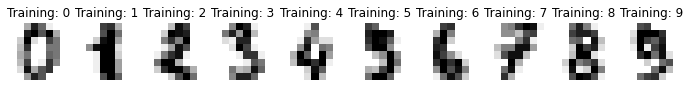

In [6]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(12,12))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

###  Para usar a imagem, precisamos formatar cada matriz de pixels como um array de uma única linha, a célula abaixo executa este processo

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

### Imprima o número de linhas e de colunas do conjunto de dados

In [9]:
print("O numero de linhas é {}, e o de colunas é {}. ".format(digits.data.shape[0], digits.data.shape[1]))

O numero de linhas é 1797, e o de colunas é 64. 


### A célula abaixo cria um objeto do tipo DecisionTreeClassifier. Como padrão a métrica para escolha do atributo de particionamento é o gini index, o número mínimo de amostras em uma folha é 1, o número mínimo de amostras em um nó para que possa ser feito o split é 2 e não há valor máximo para a profundidade da árvore. Altere a célula abaixo para a árvore de decisão utilizar o critério entropia, o número mínimo de amostras na folha igual a 3, o número mínimo de amostra para split igual a 5 e a profundidade máxima igual 5

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=5, 
                                  min_samples_split=3, 
                                  min_samples_leaf=5)

### Para realizar o treinamento, vamos dividir o dataset em treino e teste. Modifique a célula abaixo para que os dados de treino representem 70% do total dos dados e para que a amostragem seja estratificada de acordo com o valor do atributo de classe. Para isso, consulte a documentação da função no scikit-learn

In [12]:
y = digits.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, stratify=y)

### O método fit recebe os dados de treino e treina o modelo. Altere a célula abaixo passando a matriz de atributos de treino e o vetor de classes, nesta ordem

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

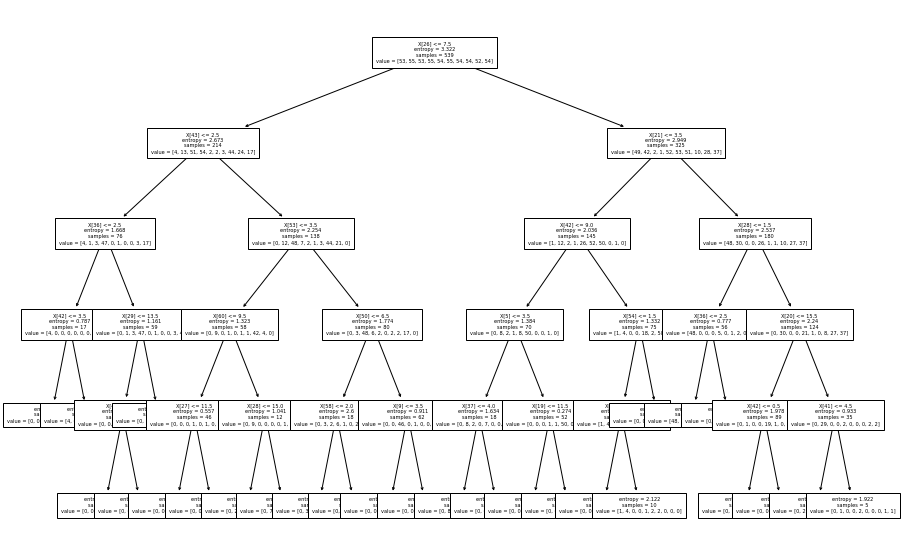

In [15]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, fontsize=5)
plt.show()

### O método predict recebe a matriz de atributos de teste e prevê a classe. Altere a célula abaixo passando como parâmetro a matriz de teste

In [16]:
predicted = clf.predict(X_test)

### O método classification_report calcula as métricas de avaliação para cada classe e as médias de cada métrica. Altere a célula passando como parâmetro o vetor de classe real e o vaetor de classe predito para o conjunto de teste

In [17]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted, output_dict=False)}\n")

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       125
           1       0.64      0.76      0.69       127
           2       0.71      0.53      0.61       124
           3       0.81      0.77      0.79       128
           4       0.66      0.43      0.52       127
           5       0.93      0.78      0.85       127
           6       0.98      0.89      0.93       127
           7       0.99      0.63      0.77       125
           8       0.38      0.80      0.52       122
           9       0.67      0.71      0.69       126

    accuracy                           0.72      1258
   macro avg       0.77      0.72      0.73      1258
weighted avg       0.78      0.72      0.73      1258




### Qual o dígito que o classificador conseguiu prever com maior acuárica? E o de menor acurácia?

De acordo com a coluna precision do classification report:
* maior accuracy foi do dígito 0
* menor accuracy foi do dígito 1

### O método a seguir imprime a matriz de confusão. As linhas indicam o valor real e as colunas o valor predito. O valor em uma célula mij, indica a quantidade de valores da classe i preditos como se fossem da classe j

Confusion matrix:
[[114   1   0   0   2   2   0   0   6   0]
 [  1  96   5   9   3   0   0   0  10   3]
 [  1  14  66  13   0   0   1   0  27   2]
 [  0   0   6  99   5   2   0   0  13   3]
 [  0   8   0   0  55   1   0   0  55   8]
 [  1   6   1   0   8  99   0   0   6   6]
 [  0   5   0   0   5   0 113   0   4   0]
 [  0   6   2   0   3   2   0  79  22  11]
 [  0  11   0   0   0   0   1   1  98  11]
 [  1   4  13   1   2   0   0   0  16  89]]


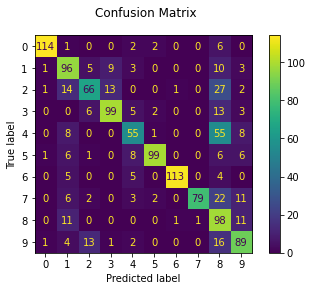

In [18]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Observe a matriz de confusão. Qual a célula com o maior número de classificações incorretas? Existe alguma similaridade no desenho dos dígitos correspondentes a essa célula?

A célula de (4,1), o qual prediz o dígito 4, 14 vezes, como o dígito 1.